# Project Team 1: Caroline Liongosari, Yueqi Su, Daniel Zhang 
## Determining Factual and Opinionated News Articles 

### Overview and Motivation: 
Provide an overview of the project goals and motivation for it. Consider that this will be read by people who did not see your project proposal.

### Data: 
Source, scraping method, cleanup, etc.

Our project group was able to use a dataset generously given to us by researchers Ishan Sahu and Debapriyo Majumdar from the Indian Statistical Institute Kolkata who did a similar project as ours in 2017. The researchers derived their dataset from the Signal Media One-Million News Articles Dataset. Their cleaned and annotated version of this dataset was provided to us. The dataset consists of 98 news articles and has 3 parts:
*  **Article Text Length**: the number of characters present in the news article
* **Article Text**: the complete text of the news article
* **Unit tags**: the factual, non-factual annotations in the format: 
    * Character position start : Character position end: Annotation
    * example: 502:634:FACTUAL implies that the article text from character position 502 to 634 is factual

In [33]:
import glob
import csv
import re
import pandas as pd
import nltk
import numpy as np
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#from unidecode import unidecode

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
stopWords = set(stopwords.words('english'))

In [3]:
# parsedData is a 2-D array with entries: [annotatedString, annotation]
parsedData = []
path = '/home/student/Documents/Project/annotated-news/*.txt'
files = glob.glob(path)

for file in files:
    f = open(file,'r')
    inputString = f.read()
    
    # inputArray: 
    # [0-2] holds ArticleTextLength.
    # [3-5] holds ArticleText.
    # [6-end] holds UnitTags.
    inputArray = inputString.split('\n')
    articleText = inputArray[4]
    unitTag = []
    
    # inputArray[6] = "<UnitTags>"
    # inputArray[7] = start of actual Unit Tags.
    i = 7
    while i<(len(inputArray)-2):
        unitTag.append(inputArray[i])
        i+=1
    
    for indexes in unitTag:
        # temp = [Character position start, Character position end, Annotation]
        temp = indexes.split(':')
        rawText = articleText[int(temp[0]):int(temp[1])-1]
        #newRawText = "u'"+rawText+"'"
        
        processedText = re.sub('\\\\u[a-zA-Z0-9]{4}',"",rawText)
        #processedText = unidecode(newRawText)
        #parsedData.append([articleText[int(temp[0]):int(temp[1])-1], temp[2]])
        parsedData.append([processedText, temp[2]])
    
    f.close()
   

In [4]:
with open("/home/student/Documents/Project/dataset.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(parsedData)

In [5]:
csv_file = "/home/student/Documents/Project/dataset.csv"
df = pd.read_table(csv_file, sep = ',', names = ['Sentence','Tag'])
tokenData = [] # With stopwords.
tokenDataFiltered = [] # Without stopwords.
for index, row in df.iterrows():
    tokenizer = RegexpTokenizer(r'\w+')
    tokenizedSentence = tokenizer.tokenize(row['Sentence']) 
    tokenData.append([tokenizedSentence, row['Tag']])
    wordsFiltered = [] # Temporary holding array for filtered tokens.
    # Filtering stopwords.
    for w in tokenizedSentence:
        if w not in stopWords:
            wordsFiltered.append(w)
    tokenDataFiltered.append([wordsFiltered, row['Tag']])        

with open("/home/student/Documents/Project/tokenizedNoStopwords.csv","w+") as my_csv:    
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(tokenDataFiltered)

with open("/home/student/Documents/Project/tokenized.csv","w+") as my_csv:    
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(tokenData)


In [6]:
 df.head(20)

,Sentence,Tag
0,We feel like it's our time to step up and prov...,NON_FACTUAL
1,"Since bursting onto the scene in 2003, All Tim...",FACTUAL
2,She even integrates Japanese manga cartoon art...,FACTUAL
3,"The song and its artsy, highly metaphoric vide...",NON_FACTUAL
4,Marie insists that she doesn't write songs for...,NON_FACTUAL
5,Ariana Grande faced backlash in July after a v...,FACTUAL
6,"The 22-year-old pop star, who was dressed in a...",NON_FACTUAL
7,"But, you know as human beings, we all say and ...",NON_FACTUAL
8,"But, you know as human beings, we all say and ...",NON_FACTUAL
9,The brunette beauty chose to put her sun-kisse...,NON_FACTUAL


In [7]:
df['Tag'] = df.Tag.map({'NON_FACTUAL': 0, "FACTUAL": 1})
df.head(5)

,Sentence,Tag
0,We feel like it's our time to step up and prov...,0
1,"Since bursting onto the scene in 2003, All Tim...",1
2,She even integrates Japanese manga cartoon art...,1
3,"The song and its artsy, highly metaphoric vide...",0
4,Marie insists that she doesn't write songs for...,0


In [8]:
#define X and Y
X= df.Sentence
y = df.Tag

In [9]:
print df.shape

(357, 2)


In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape
print X_test.shape

(267,)
(90,)


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
# instantiate the vectorizer
v = CountVectorizer()

In [12]:
# learn training data vocabulary, then create document-term matrix

X_train_data = v.fit_transform(X_train)
X_train_data

<267x2357 sparse matrix of type '<type 'numpy.int64'>'
	with 5519 stored elements in Compressed Sparse Row format>

In [13]:
X_test_data = v.transform(X_test)
X_test_data 

<90x2357 sparse matrix of type '<type 'numpy.int64'>'
	with 1365 stored elements in Compressed Sparse Row format>

### Exploratory Analysis
What visualizations did you use to look at your data in different ways? What are the different statistical methods you considered? Justify the decisions you made, and show any major changes to your ideas. How did you reach these conclusions?

In [14]:
# train a Naive Bayes model using X_train_dtm
from sklearn.naive_bayes import MultinomialNB
# TODO
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
# make class predictions for X_test_dtm
# TODO
y_pred_class = naive_bayes.predict(X_test_data)

In [16]:
# calculate accuracy of class predictions
# compute the accuracy scores
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.6777777777777778


In [17]:
# confusion matrix
# TODO
matrix =metrics.confusion_matrix(y_test, y_pred_class)
print matrix

[[28 14]
 [15 33]]


Text(91.68,0.5,u'predicting labels')

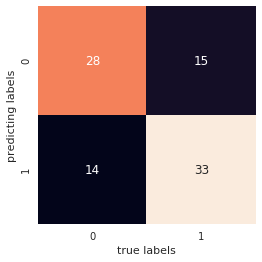

In [26]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 

sns.heatmap(matrix.T, square = True, annot=True, fmt='d', cbar=False)
plt.xlabel('true labels')
plt.ylabel('predicting labels')

In [19]:
# print message text for the false positives
# TODO# print message text for the false negatives
# TODO
print X_test[y_test > y_pred_class]

333    Landauer Nordic develops and sells products an...
211    The most likely candidate, Wolfgang Porsche, f...
354    He was part of the team's run to the prelimina...
163    As a Titanium sponsor of Dreamforce 2015, Docu...
274    The latest policy response to signs of stutter...
270    If a law firm needs to get information or data...
344    Among the issues addressed, the commission cit...
342    An independent commission in the state of Miss...
18     The study continues to enroll patients with ME...
5      Ariana Grande faced backlash in July after a v...
117    Following the question-and-answer period, the ...
85     One difference between Bunker and Wall and the...
222    About OppenheimerFunds OppenheimerFunds, a lea...
205    There are 180 million Chinese over the age of ...
146    Then in early 2014, it was announced Mountainv...
Name: Sentence, dtype: object


In [20]:
# print message text for the false negatives
# TODO
print X_test[y_test > y_pred_class]

333    Landauer Nordic develops and sells products an...
211    The most likely candidate, Wolfgang Porsche, f...
354    He was part of the team's run to the prelimina...
163    As a Titanium sponsor of Dreamforce 2015, Docu...
274    The latest policy response to signs of stutter...
270    If a law firm needs to get information or data...
344    Among the issues addressed, the commission cit...
342    An independent commission in the state of Miss...
18     The study continues to enroll patients with ME...
5      Ariana Grande faced backlash in July after a v...
117    Following the question-and-answer period, the ...
85     One difference between Bunker and Wall and the...
222    About OppenheimerFunds OppenheimerFunds, a lea...
205    There are 180 million Chinese over the age of ...
146    Then in early 2014, it was announced Mountainv...
Name: Sentence, dtype: object


In [21]:
# import/instantiate/fit
from sklearn.linear_model import LogisticRegression
# TODO
logreg = LogisticRegression()
logreg.fit(X_train_data, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
# class predictions and predicted probabilities
# TODO
y_pred_class = logreg.predict(X_test_data)

In [23]:
# calculate accuracy
# TODO
print metrics.accuracy_score(y_test, y_pred_class)

0.6888888888888889


In [24]:
matrix2 =metrics.confusion_matrix(y_test, y_pred_class)
print matrix2

[[25 17]
 [11 37]]


Text(91.68,0.5,u'predicting labels')

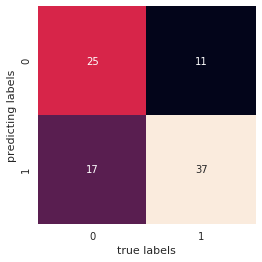

In [25]:
sns.heatmap(matrix2.T, square = True, annot=True, fmt='d', cbar=False)
plt.xlabel('true labels')
plt.ylabel('predicting labels')

In [ ]:
X= df['Sentence']
y = df['Tag']

In [ ]:
# plot the class predictions
y_pred_class['prediction'] = pred
glass.plot.scatter(x = 'al', y = 'household')
plt.plot(glass.al, glass.prediction, color='red')


### Final Analysis: 
What did you learn about the data? How did you answer the questions? How can you justify your answers? 

In [57]:
Xt_tokens = v.get_feature_names()
Xt_count = np.sum(X_train_data.toarray(), axis =0)
Xt_count

Xt_count = np.sum(X_train_data.toarray(), axis =0)
print Xt_count
print Xt_count.shape
print len(Xt_tokens)

[5 2 1 ... 1 1 1]
(2357,)
2902


In [53]:
# create a DataFrame of tokens with their counts
# such that you will have two columns -- count and token
# TODO
df_token = pd.DataFrame({'token':Xt_tokens, 'count':Xt_count})
df_token.sort_values(by='count', ascending=False)

ValueError: arrays must all be same length

In [27]:
# create separate DataFrames for ham and spam
non_fact = df[df.Tag==0]
fact = df[df.Tag==1]

In [28]:
# learn the vocabulary of ALL messages and save it
v.fit(df.Sentence)
# put the names of all features (tokens) into a variable
all_tokens = v.get_feature_names()

In [29]:
# create document-term matrices for ham and spam

fact_doc = v.transform(fact['Sentence'])
nonfact_doc = v.transform(non_fact['Sentence'])

In [34]:
# count how many times EACH token appears across ALL ham messages
# TODO
fact_count = np.sum(fact_doc.toarray(), axis=0)
fact_count

array([6, 2, 1, ..., 1, 1, 1])

In [35]:
nonfact_count = np.sum(nonfact_doc.toarray(), axis=0)
nonfact_count

array([0, 0, 0, ..., 0, 1, 0])

In [46]:
tokens= pd.DataFrame({'token':all_tokens, 'fact': fact_count, 'nonfact': nonfact_count})
tokens.sample(10)

,fact,nonfact,token
2473,2,1,standard
663,1,0,consists
2234,1,0,reviewing
2421,1,0,solely
1828,0,1,open
2128,0,1,rebound
1879,1,0,parishad
19,1,0,16th
1874,2,1,panel
397,0,1,beyou
